In [71]:
import warnings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('ggplot')
pd.plotting.register_matplotlib_converters()
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
sns.mpl.rc("figure", figsize=(16, 6))

In [72]:
gross_data = pd.read_csv('https://raw.githubusercontent.com/tacookson/data/master/broadway-grosses/grosses.csv',parse_dates = ['week_ending'])
show_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/show_info_1985-2019.csv')
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])

In [73]:
CPI_data = pd.read_csv('https://raw.githubusercontent.com/PSha98/Erdos-2022-project/main/Data_collection/CPI_USBLS.csv', parse_dates = ['DATE'])
CPI_data.rename(columns = {'CWSR0000SA0':'CPI'}, inplace = True)
gross_data['year'] = gross_data['week_ending'].dt.year
gross_data['month_c'] = [d.strftime('%b') for d in gross_data.week_ending]
gross_data['month'] = gross_data['week_ending'].dt.month
CPI_data['year'] = CPI_data['DATE'].dt.year
CPI_data['month']= CPI_data['DATE'].dt.month
gross_data

,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,3915937.00,42nd Street,St. James Theatre,282368.00,NaN,30.42,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,3915937.00,A Chorus Line,Sam S. Shubert Theatre,222584.00,NaN,27.25,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,3915937.00,Aren't We All?,Brooks Atkinson Theatre,249272.00,NaN,33.75,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,3915937.00,Arms and the Man,Circle in the Square Theatre,95688.00,NaN,20.87,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,3915937.00,As Is,Lyceum Theatre,61059.00,NaN,20.78,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,26109896.25,The Phantom of the Opera,Majestic Theatre,639215.93,1358986.0,72.18,213.0,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,26109896.25,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1320766.00,1566688.0,132.02,297.0,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,26109896.25,To Kill A Mockingbird,Sam S. Shubert Theatre,1132278.54,1549625.0,115.41,423.0,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,26109896.25,West Side Story,Broadway Theatre,1598947.32,1722464.0,114.87,373.0,13920,1740,1.0000,8,0,2020,Mar,3


In [74]:
CPI_data['CPI'] = CPI_data.iloc[-1]['CPI']/CPI_data['CPI']
CPI_data

,DATE,CPI,year,month
0,1947-01-01,13.148889,1947,1
1,1947-02-01,13.064213,1947,2
2,1947-03-01,12.839783,1947,3
3,1947-04-01,12.839783,1947,4
4,1947-05-01,12.863043,1947,5
...,...,...,...,...
899,2021-12-01,1.031327,2021,12
900,2022-01-01,1.024507,2022,1
901,2022-02-01,1.015750,2022,2
902,2022-03-01,1.001908,2022,3


In [75]:
CPI_data2 = CPI_data[['CPI','month','year']]
gross_data2 = gross_data.merge(CPI_data2, how = 'left', on = ['month', 'year'])
gross_data['weekly_gross_overall'] = gross_data2['weekly_gross_overall']*gross_data2['CPI']
gross_data['weekly_gross'] = gross_data2['weekly_gross']*gross_data2['CPI']
gross_data['avg_ticket_price'] = gross_data2['avg_ticket_price']*gross_data2['CPI']
gross_data['potential_gross'] = gross_data2['potential_gross']*gross_data2['CPI']
gross_data['top_ticket_price']= gross_data2['top_ticket_price']*gross_data2['CPI']
gross_data['year']=gross_data.year.astype(int).astype(str)
gross_data


,week_ending,week_number,weekly_gross_overall,show,theatre,weekly_gross,potential_gross,avg_ticket_price,top_ticket_price,seats_sold,seats_in_theatre,pct_capacity,performances,previews,year,month_c,month
0,1985-06-09,1,1.040401e+07,42nd Street,St. James Theatre,7.502061e+05,NaN,80.821017,NaN,9281,1655,0.7010,8,0,1985,Jun,6
1,1985-06-09,1,1.040401e+07,A Chorus Line,Sam S. Shubert Theatre,5.913697e+05,NaN,72.398840,NaN,8167,1472,0.6935,8,0,1985,Jun,6
2,1985-06-09,1,1.040401e+07,Aren't We All?,Brooks Atkinson Theatre,6.622754e+05,NaN,89.668288,NaN,7386,1088,0.8486,8,0,1985,Jun,6
3,1985-06-09,1,1.040401e+07,Arms and the Man,Circle in the Square Theatre,2.542275e+05,NaN,55.448213,NaN,4586,682,0.8405,8,0,1985,Jun,6
4,1985-06-09,1,1.040401e+07,As Is,Lyceum Theatre,1.622239e+05,NaN,55.209097,NaN,2938,684,0.5369,8,0,1985,Jun,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47519,2020-03-01,40,2.949006e+07,The Phantom of the Opera,Majestic Theatre,7.219681e+05,1.534919e+06,81.524345,240.574751,8856,1605,0.6897,8,0,2020,Mar,3
47520,2020-03-01,40,2.949006e+07,Tina: The Tina Turner Musical,Lunt-Fontanne Theatre,1.491751e+06,1.769510e+06,149.111167,335.449300,10004,1478,0.8461,8,0,2020,Mar,3
47521,2020-03-01,40,2.949006e+07,To Kill A Mockingbird,Sam S. Shubert Theatre,1.278862e+06,1.750238e+06,130.350854,477.761125,9811,1435,0.9767,7,0,2020,Mar,3
47522,2020-03-01,40,2.949006e+07,West Side Story,Broadway Theatre,1.805945e+06,1.945452e+06,129.740947,421.288179,13920,1740,1.0000,8,0,2020,Mar,3


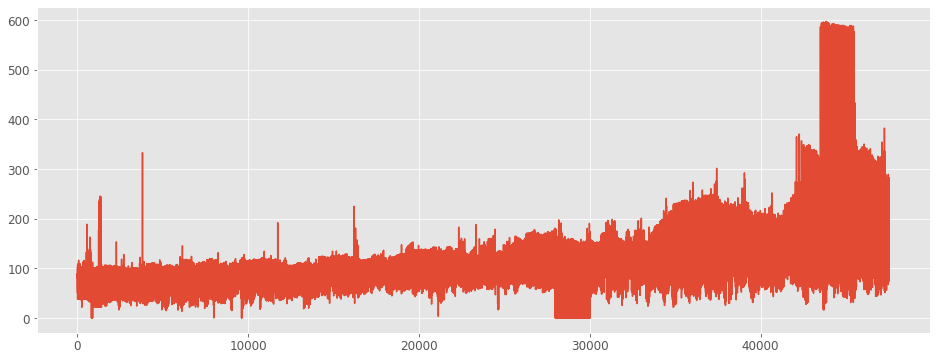

In [76]:
g_data = gross_data['avg_ticket_price']
plt.plot(g_data)

In [77]:
df = gross_data[['avg_ticket_price','year','month']]
df2 = df.groupby(['month','year']).mean().reset_index()
cols = ['year','month','day']
df2['day'] = [1 for _ in range(df2.shape[0])]
df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df2['date']=pd.to_datetime(df2['date'])
df3 = df2[['date','avg_ticket_price']]
df3.set_index(['date'], inplace = True)
df3

,avg_ticket_price
date,
1986-01-01,74.528309
1987-01-01,71.323582
1988-01-01,75.417636
1989-01-01,76.395114
1990-01-01,73.758397
...,...
2015-12-01,123.074010
2016-12-01,130.840420
2017-12-01,158.667400


In [78]:
y = df3.avg_ticket_price
y = y.asfreq("MS")
y

date
1985-06-01     72.701145
1985-07-01     68.940038
1985-08-01     70.100076
1985-09-01     69.365135
1985-10-01     73.301437
                 ...    
2019-11-01    125.611575
2019-12-01    150.874142
2020-01-01    137.071973
2020-02-01    130.110879
2020-03-01    118.309612
Freq: MS, Name: avg_ticket_price, Length: 418, dtype: float64

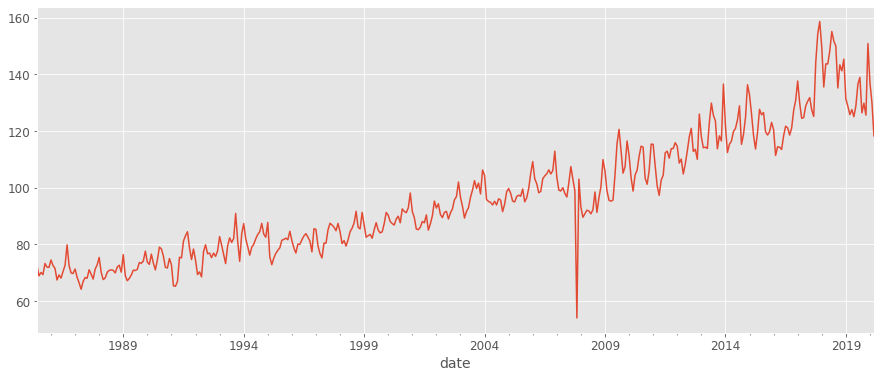

In [79]:
y.plot(figsize=(15, 6))
plt.show()

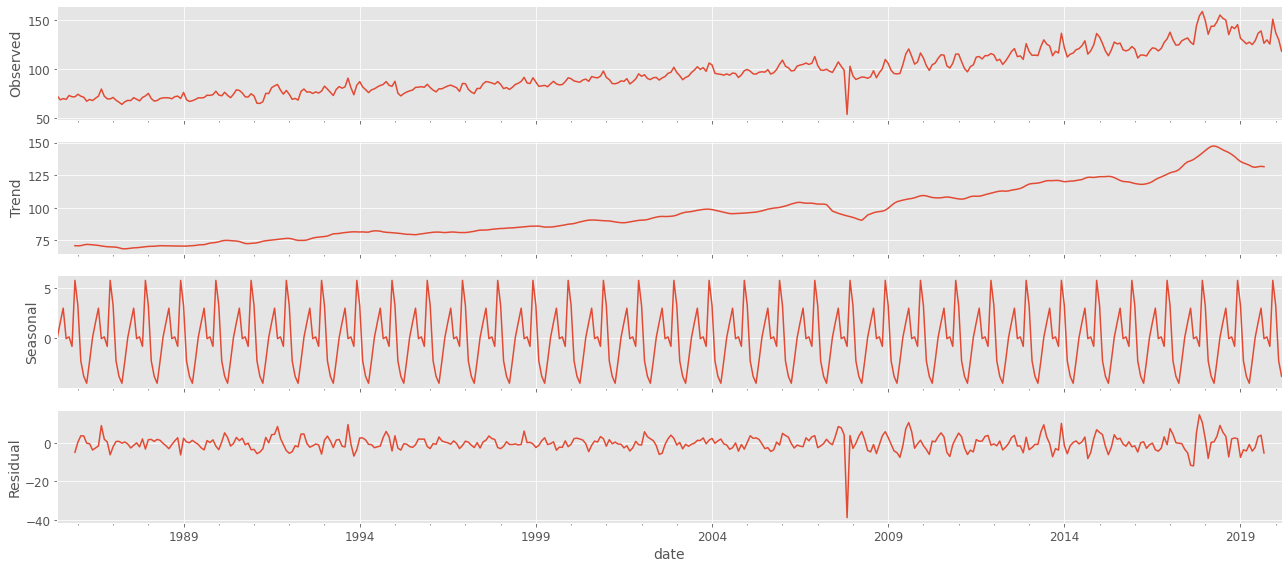

In [80]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [81]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [82]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:5013.257040988308
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:4384.451444659748
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2849.9737235303173
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2728.5619918996717
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2843.9223933981866
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2652.133315083186
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2746.755217885161
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2730.5609872514233
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:4478.850695819958
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:3912.6395164644227
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2685.588814921687
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2554.2279510983344
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2692.811836905177
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2503.4375960151656
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2584.283695852247
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2556.227873676513
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2657.0334967771482
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2551.0427756665413
A

AIC: Akaike Information Critera-An estimator of prediction error and thereby relative quality of statistical models for a given set of data. Given a collection of models for the data, AIC estimates the quality of each model, relative to each of the other models. 

AIC = $2k-2Ln(\hat{L})$

k=number of estimated parameters in the model

$\hat{L}$=maxiumum likelihood function of the model

In [83]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2970      0.081      3.647      0.000       0.137       0.457
ma.L1         -0.6914      0.073     -9.522      0.000      -0.834      -0.549
ar.S.L12      -0.4825      0.017    -27.603      0.000      -0.517      -0.448
sigma2        29.4146      0.657     44.787      0.000      28.127      30.702


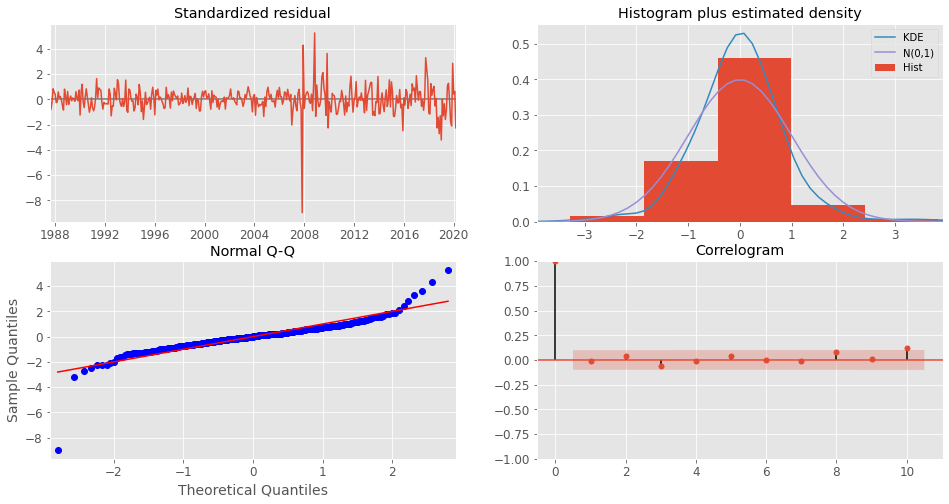

In [84]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

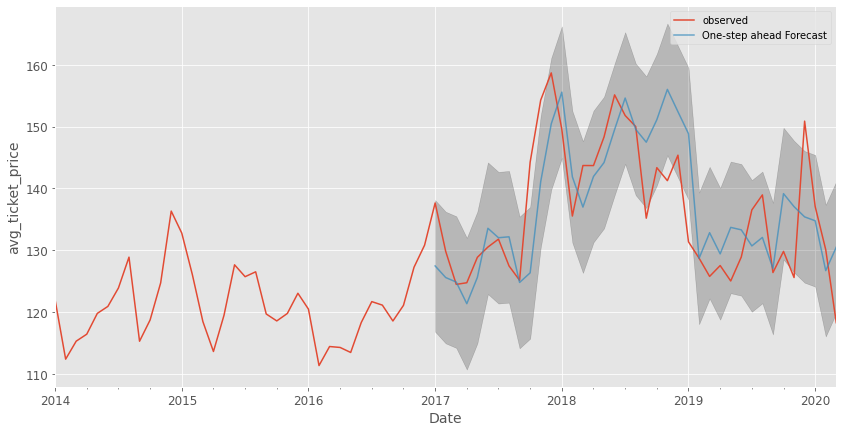

In [85]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('avg_ticket_price')
plt.legend()
plt.show()

In [86]:
y_forecasted = pred.predicted_mean
y_truth = y['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 65.42


In [87]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))
ARIMAF_RMSE = round(np.sqrt(mse), 2)
ARIMAF_RMSE

The Root Mean Squared Error of our forecasts is 8.09


8.09

In [88]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=True,full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

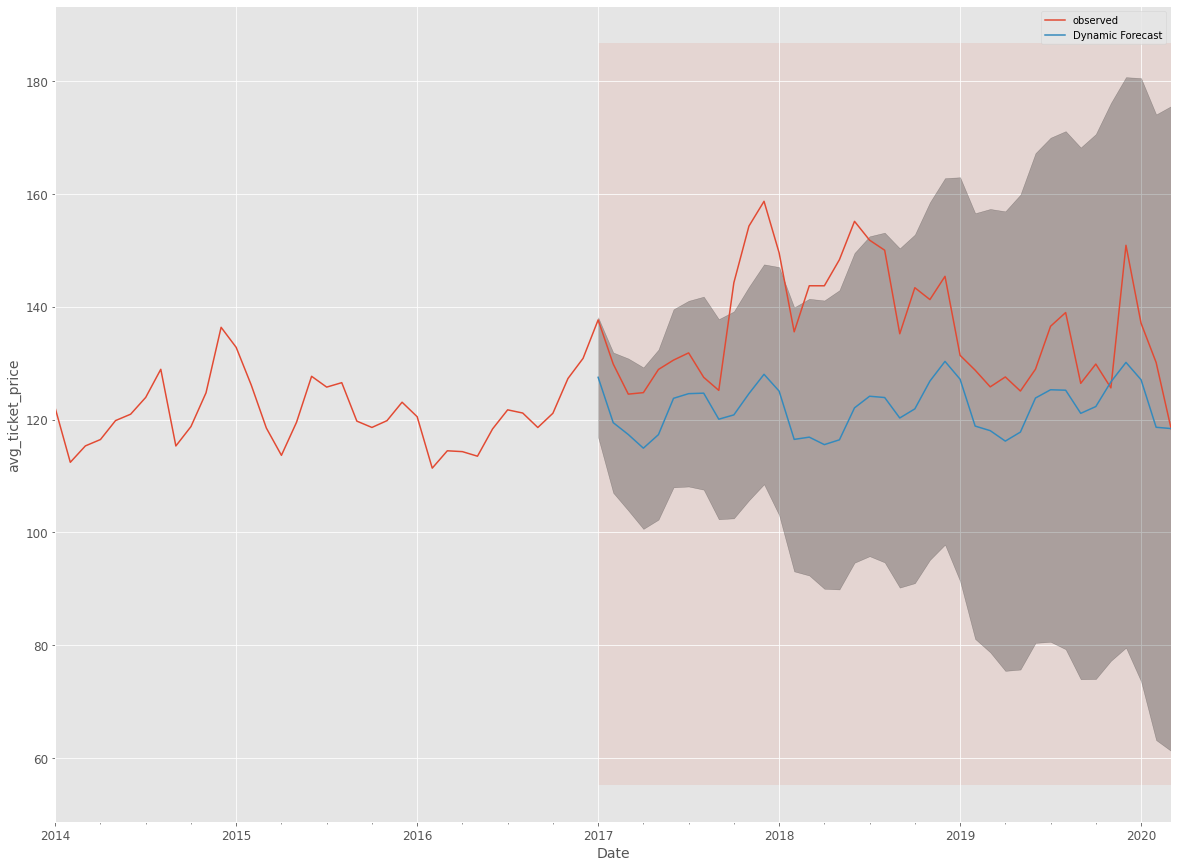

In [89]:
ax = y['2014':].plot(label='observed', figsize=(20, 15))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2017-01-01'), y.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Date')
ax.set_ylabel('avg_ticket_price')

plt.legend()
plt.show()

In [90]:
y_forecasted = pred_dynamic.predicted_mean
y_truth = y['2017-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 297.2


In [91]:
print('The Root Mean Squared Error of our dyanmic forecasts is {}'.format(round(np.sqrt(mse), 2)))
ARIMADF_RMSE = round(np.sqrt(mse), 2)

The Root Mean Squared Error of our dyanmic forecasts is 17.24


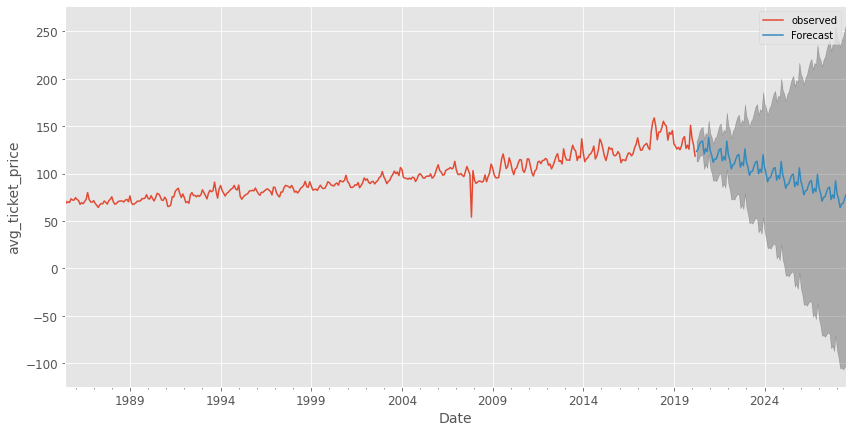

In [92]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('avg_ticket_price')
plt.legend()
plt.show()

In [93]:
df = gross_data[['avg_ticket_price','week_ending','year','month']]
df2 = df.groupby(['month','year']).sum().reset_index()
df2

,month,year,avg_ticket_price
0,1,1986,6856.604414
1,1,1987,5349.268682
2,1,1988,7390.928311
3,1,1989,7563.116309
4,1,1990,5679.396554
...,...,...,...
413,12,2015,13661.215123
414,12,2016,16878.414144
415,12,2017,25069.449142
416,12,2018,28203.041785


In [94]:
!pip install scalecast

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
from scalecast.Forecaster import Forecaster
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

In [96]:
f = Forecaster(y=y,
                   current_dates=y.index)

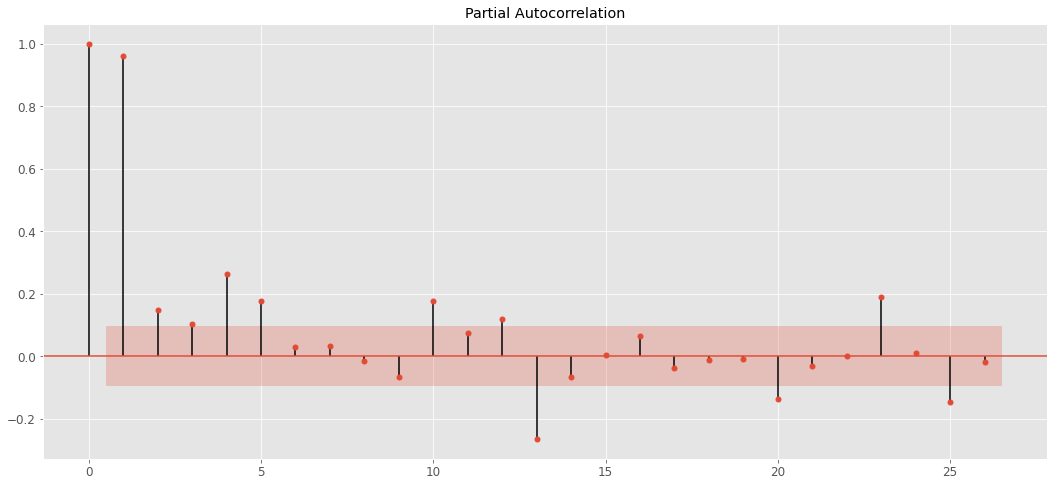

In [97]:
f.plot_pacf(lags=26)
plt.show()

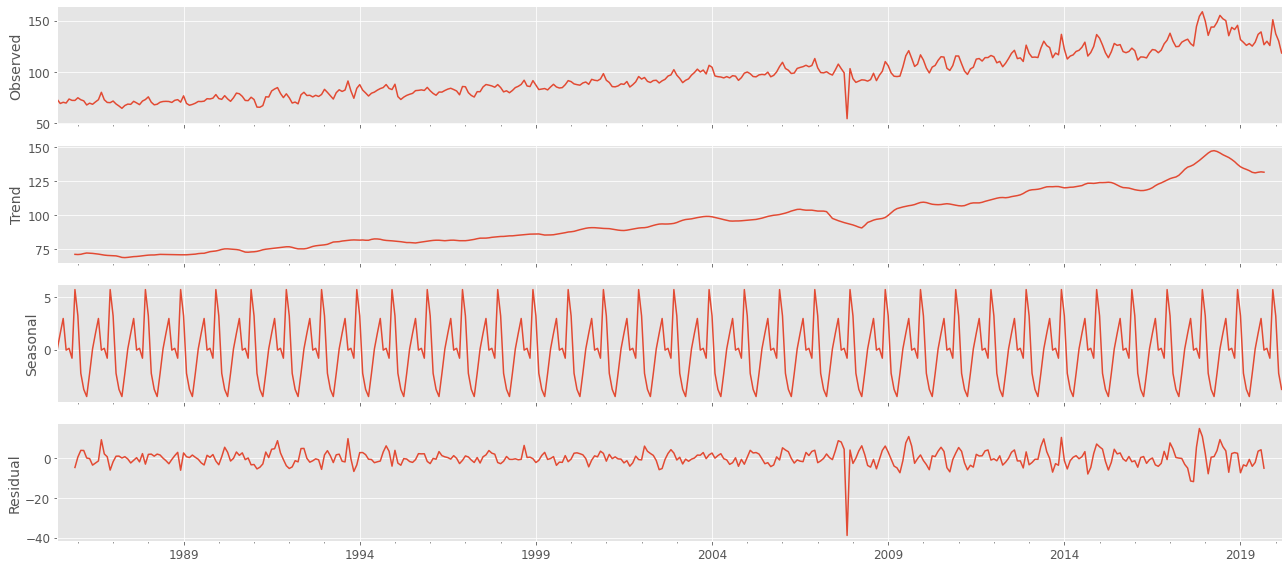

In [98]:
f.seasonal_decompose().plot()
plt.show()

In [99]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)
print(stat,pval)

-0.6465804988882405 0.8601056430208808


In [100]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(12) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural networkf.manual_forecast(call_me='lstm_default')


13/13 [==============================] - 3s 3ms/step - loss: 0.4078


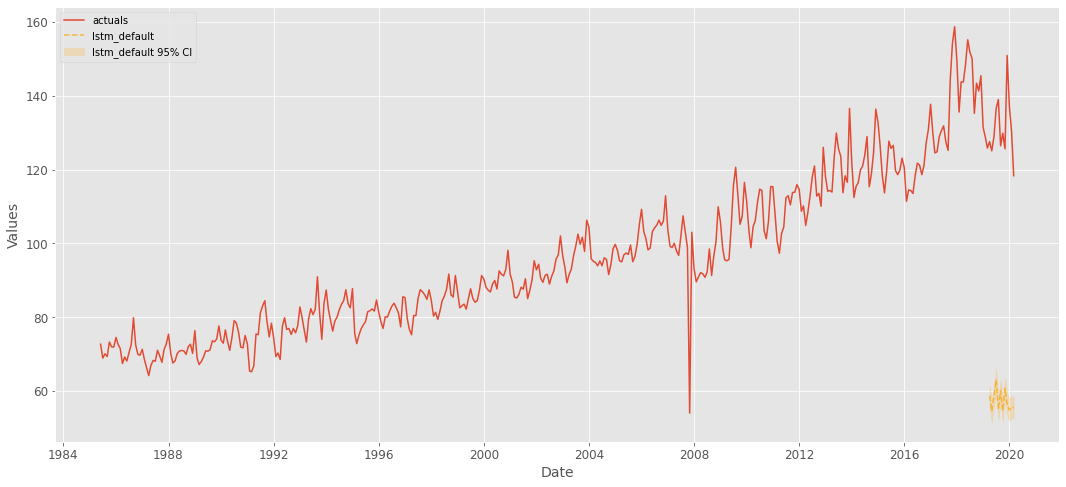

In [101]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

12/12 [==============================] - 5s 21ms/step - loss: 0.3290


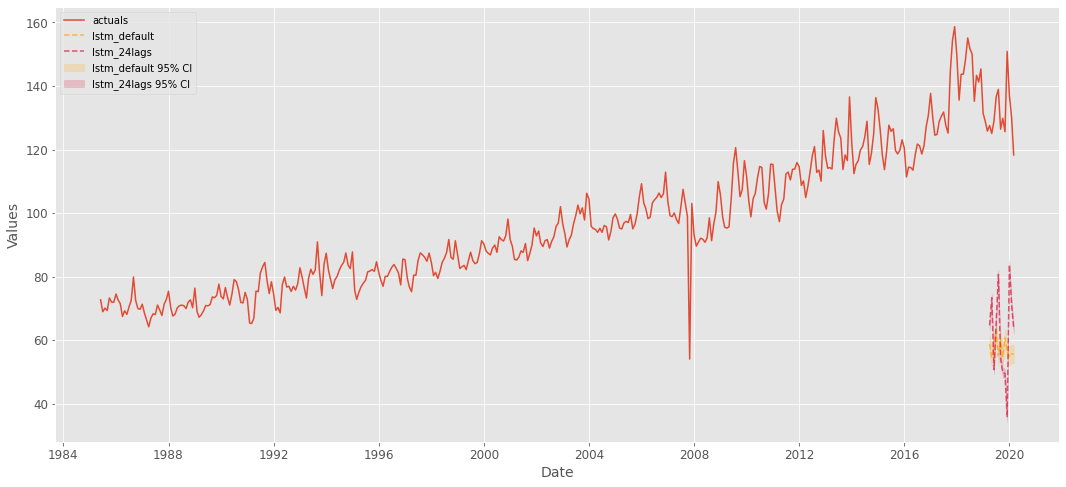

In [102]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Epoch 1/5
10/10 [==============================] - 5s 135ms/step - loss: 0.4443 - val_loss: 0.1769
Epoch 2/5
10/10 [==============================] - 0s 20ms/step - loss: 0.4151 - val_loss: 0.1581
Epoch 3/5
10/10 [==============================] - 0s 17ms/step - loss: 0.3875 - val_loss: 0.1393
Epoch 4/5
10/10 [==============================] - 0s 33ms/step - loss: 0.3584 - val_loss: 0.1205
Epoch 5/5
10/10 [==============================] - 0s 29ms/step - loss: 0.3252 - val_loss: 0.1083
Epoch 1/5
10/10 [==============================] - 3s 66ms/step - loss: 0.4821 - val_loss: 0.1876
Epoch 2/5
10/10 [==============================] - 0s 13ms/step - loss: 0.4498 - val_loss: 0.1650
Epoch 3/5
10/10 [==============================] - 0s 13ms/step - loss: 0.4166 - val_loss: 0.1422
Epoch 4/5
10/10 [==============================] - 0s 13ms/step - loss: 0.3802 - val_loss: 0.1274
Epoch 5/5
10/10 [==============================] - 0s 11ms/step - loss: 0.3409 - val_loss: 0.1273


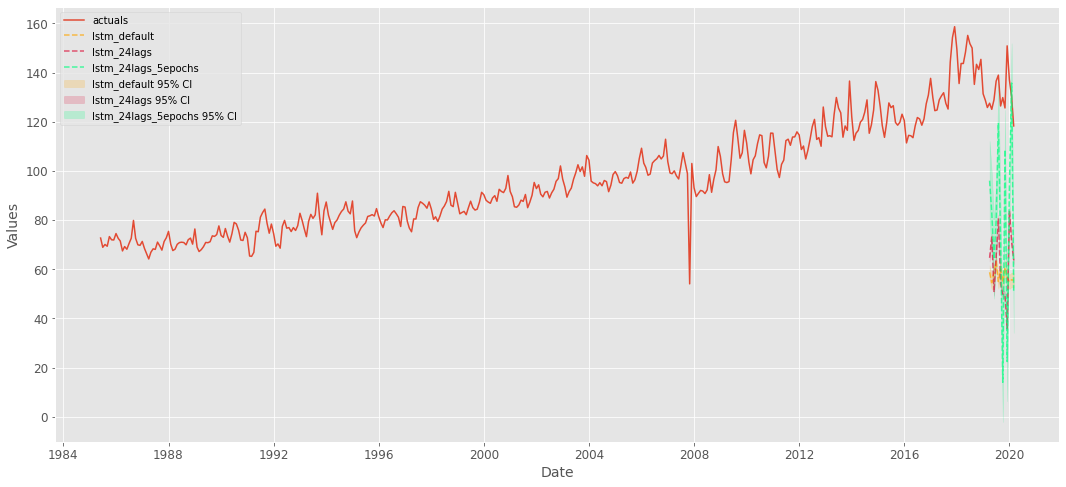

In [103]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Epoch 1/25
10/10 [==============================] - 7s 171ms/step - loss: 0.4428 - val_loss: 0.1511
Epoch 2/25
10/10 [==============================] - 0s 29ms/step - loss: 0.3521 - val_loss: 0.0911
Epoch 3/25
10/10 [==============================] - 0s 28ms/step - loss: 0.2126 - val_loss: 0.1698
Epoch 4/25
10/10 [==============================] - 0s 29ms/step - loss: 0.1422 - val_loss: 0.1409
Epoch 5/25
10/10 [==============================] - 0s 28ms/step - loss: 0.1120 - val_loss: 0.1164
Epoch 6/25
10/10 [==============================] - 0s 28ms/step - loss: 0.0907 - val_loss: 0.0782
Epoch 7/25
10/10 [==============================] - 0s 29ms/step - loss: 0.0672 - val_loss: 0.0376
Epoch 8/25
10/10 [==============================] - 0s 28ms/step - loss: 0.0574 - val_loss: 0.0378
Epoch 9/25
10/10 [==============================] - 0s 30ms/step - loss: 0.0561 - val_loss: 0.0358
Epoch 10/25
10/10 [==============================] - 0s 29ms/step - loss: 0.0536 - val_loss: 0.0333
Epoch 11

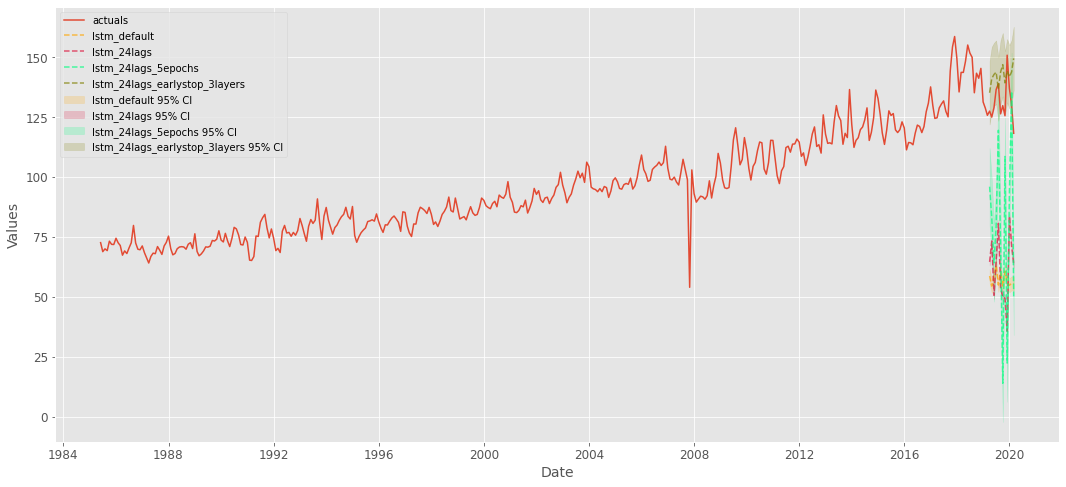

In [104]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
9/9 [==============================] - 10s 302ms/step - loss: 0.3085 - val_loss: 0.1655
Epoch 2/15
9/9 [==============================] - 1s 93ms/step - loss: 0.1234 - val_loss: 0.1464
Epoch 3/15
9/9 [==============================] - 1s 89ms/step - loss: 0.0971 - val_loss: 0.0583
Epoch 4/15
9/9 [==============================] - 1s 90ms/step - loss: 0.0710 - val_loss: 0.0332
Epoch 5/15
9/9 [==============================] - 1s 92ms/step - loss: 0.0558 - val_loss: 0.0658
Epoch 6/15
9/9 [==============================] - 1s 94ms/step - loss: 0.0548 - val_loss: 0.0388
Epoch 7/15
9/9 [==============================] - 1s 92ms/step - loss: 0.0535 - val_loss: 0.0345
Epoch 8/15
9/9 [==============================] - 1s 89ms/step - loss: 0.0526 - val_loss: 0.0422
Epoch 9/15
9/9 [==============================] - 2s 177ms/step - loss: 0.0538 - val_loss: 0.0343
Epoch 10/15
9/9 [==============================] - 2s 180ms/step - loss: 0.0530 - val_loss: 0.0424
Epoch 11/15
9/9 [========

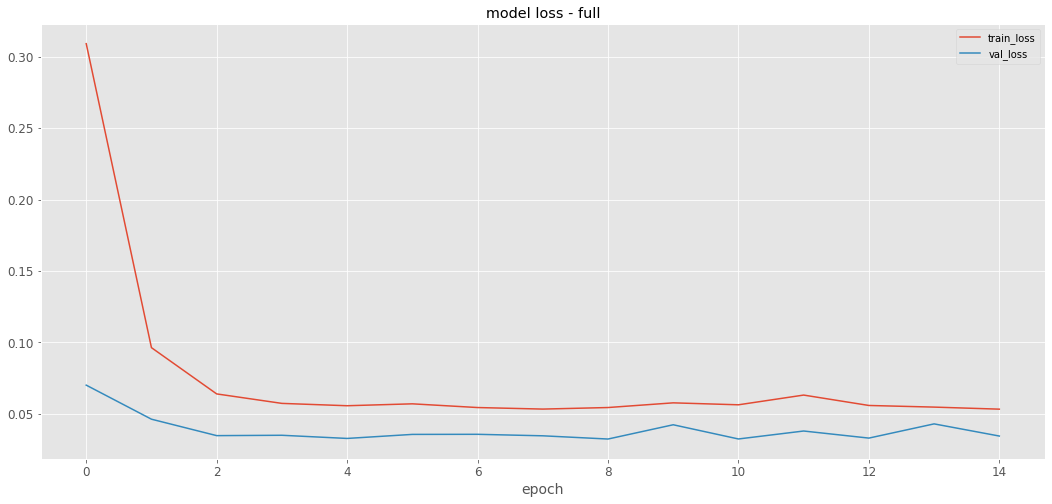

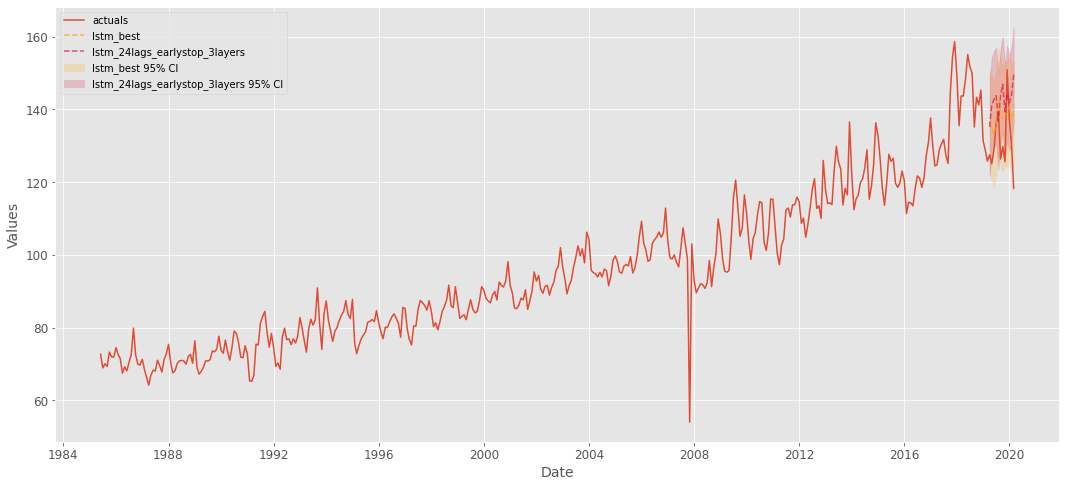

In [105]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

In [106]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

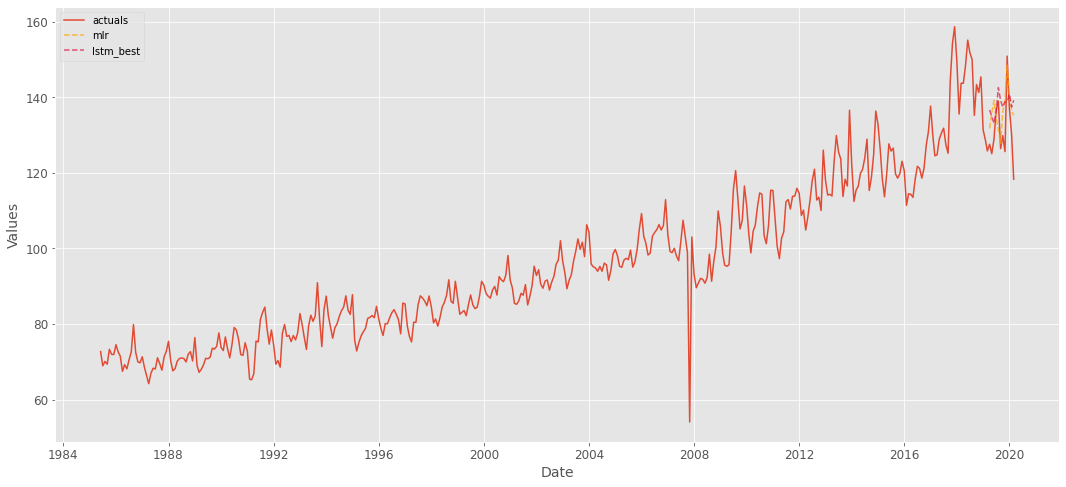

In [107]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

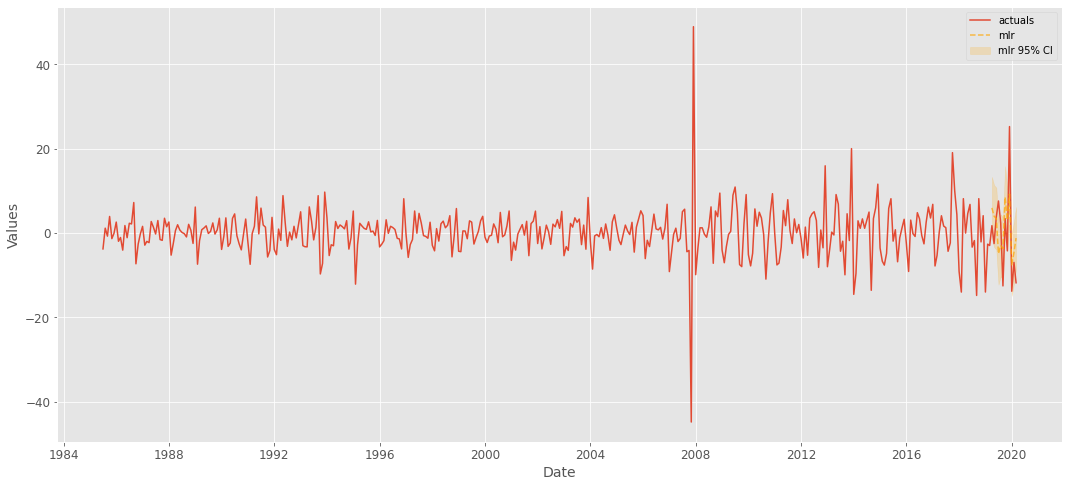

In [108]:
f.plot_test_set(models='mlr',ci=True)

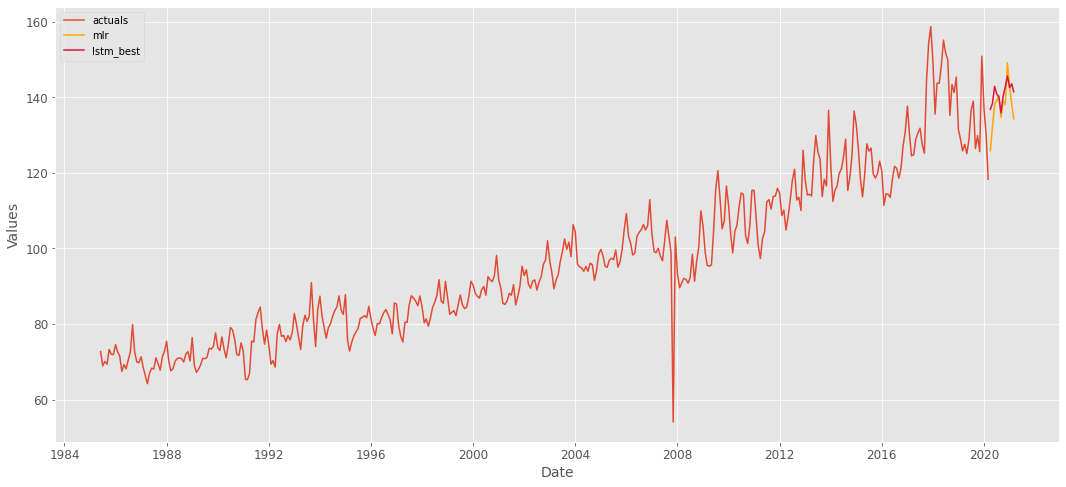

In [109]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE',
       level=True)

In [110]:
f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

,ModelNickname,LevelTestSetMAPE,LevelTestSetRMSE,LevelTestSetR2,best_model
0,mlr,0.056152,8.556401,-0.112487,True
1,lstm_best,0.067991,10.219671,-0.587035,False
2,lstm_24lags_earlystop_3layers,0.099425,14.681994,-2.275539,False
3,lstm_24lags_5epochs,0.407623,64.765323,-62.737903,False
4,lstm_24lags,0.526319,71.414058,-76.496150,False
5,lstm_default,0.561474,74.429061,-83.177840,False


In [111]:
err = f.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname','LevelTestSetRMSE']]
MLR_RMSE = err[err['ModelNickname']=='mlr']['LevelTestSetRMSE'][0]
LSTM_RMSE = err[err['ModelNickname']=='lstm_best']['LevelTestSetRMSE']
LSTM_RMSE = LSTM_RMSE[1]
LSTM_RMSE

10.219671320139085

In [112]:
!pip install pystan


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [113]:
df = gross_data[['avg_ticket_price','week_ending','year','month']]
df2 = df.groupby(['month','year']).sum().reset_index()
cols = ['year','month','day']
df2['day'] = [1 for _ in range(df2.shape[0])]
df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
df2['date']=pd.to_datetime(df2['date'])
df3 = df2[['date','avg_ticket_price']]
#df3.set_index(['date'], inplace = True)
df3


,date,avg_ticket_price
0,1986-01-01,6856.604414
1,1987-01-01,5349.268682
2,1988-01-01,7390.928311
3,1989-01-01,7563.116309
4,1990-01-01,5679.396554
...,...,...
413,2015-12-01,13661.215123
414,2016-12-01,16878.414144
415,2017-12-01,25069.449142
416,2018-12-01,28203.041785


In [114]:
df3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              418 non-null    datetime64[ns]
 1   avg_ticket_price  418 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.7 KB


In [115]:
df3 = df3.rename(columns={'date': 'ds','avg_ticket_price': 'y'})


In [116]:
from fbprophet import Prophet

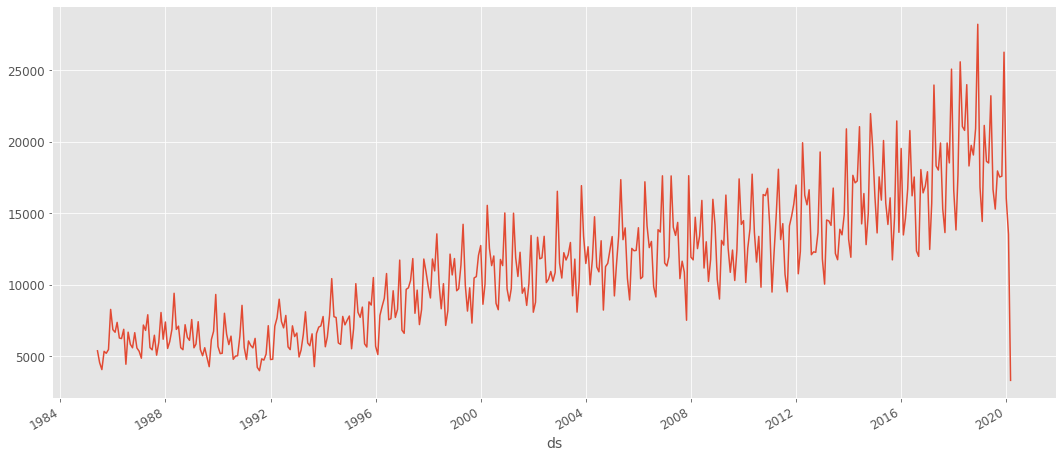

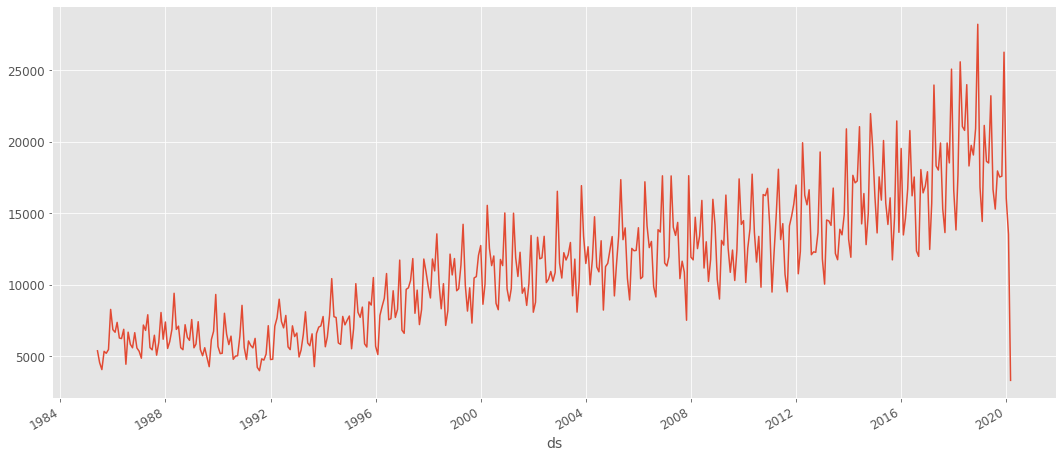

In [117]:
plt.figure()
df3.set_index('ds').y.plot().get_figure()

In [118]:
model = Prophet(weekly_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
model.fit(df3);
model.weekly_seasonality

False

In [119]:
future = model.make_future_dataframe(periods=24, freq = 'm')
future.tail()

,ds
437,2021-10-31
438,2021-11-30
439,2021-12-31
440,2022-01-31
441,2022-02-28


In [120]:
forecast = model.predict(future)

In [121]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
437,2021-10-31,11003.919595,12928.754578,17696.319603,11003.919514,11003.919673,4188.648738,4188.648738,4188.648738,2687.571144,2687.571144,2687.571144,1501.077594,1501.077594,1501.077594,0.0,0.0,0.0,15192.568332
438,2021-11-30,11003.216862,11590.567839,16440.180919,11003.216775,11003.216946,3025.078318,3025.078318,3025.078318,684.825737,684.825737,684.825737,2340.252581,2340.252581,2340.252581,0.0,0.0,0.0,14028.295181
439,2021-12-31,11002.490706,11279.135746,16039.121167,11002.490607,11002.490796,2627.595370,2627.595370,2627.595370,2687.571144,2687.571144,2687.571144,-59.975774,-59.975774,-59.975774,0.0,0.0,0.0,13630.086075
440,2022-01-31,11001.764549,10890.014622,15559.783362,11001.764444,11001.764645,2386.353247,2386.353247,2386.353247,4575.370537,4575.370537,4575.370537,-2189.017290,-2189.017290,-2189.017290,0.0,0.0,0.0,13388.117796
441,2022-02-28,11001.108665,5537.939342,10219.317257,11001.108552,11001.108767,-2995.787109,-2995.787109,-2995.787109,-4225.709302,-4225.709302,-4225.709302,1229.922193,1229.922193,1229.922193,0.0,0.0,0.0,8005.321556


In [122]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
437,2021-10-31,15192.568332,12928.754578,17696.319603
438,2021-11-30,14028.295181,11590.567839,16440.180919
439,2021-12-31,13630.086075,11279.135746,16039.121167
440,2022-01-31,13388.117796,10890.014622,15559.783362
441,2022-02-28,8005.321556,5537.939342,10219.317257


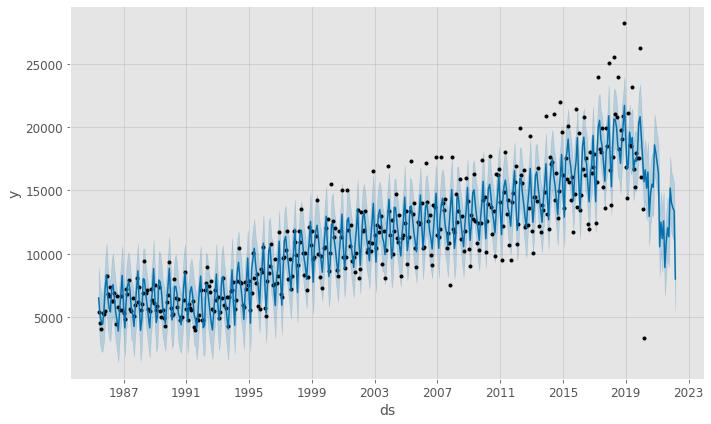

In [123]:
model.plot(forecast);

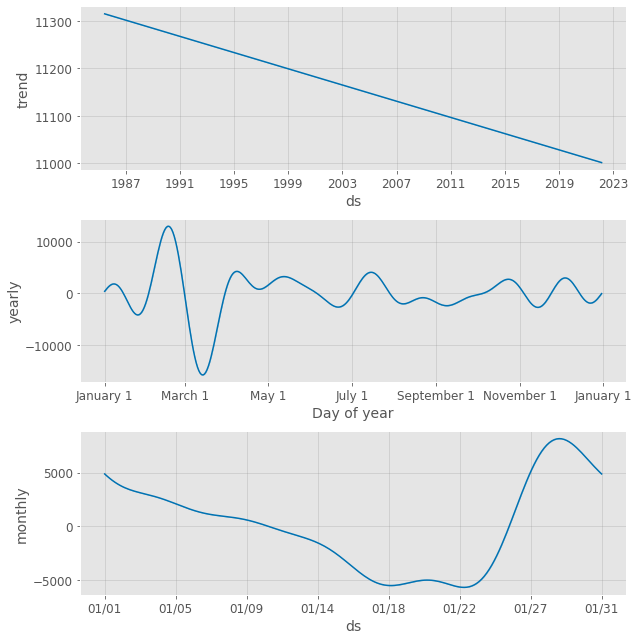

In [124]:
model.plot_components(forecast);

In [125]:
metric_df = forecast.set_index('ds')[['yhat']].join(df3.set_index('ds').y).reset_index()

In [126]:
metric_df.tail()

,ds,yhat,y
437,2021-10-31,15192.568332,NaN
438,2021-11-30,14028.295181,NaN
439,2021-12-31,13630.086075,NaN
440,2022-01-31,13388.117796,NaN
441,2022-02-28,8005.321556,NaN


In [127]:
metric_df.dropna(inplace=True)

In [128]:
metric_df.tail()

,ds,yhat,y
413,2019-11-01,20351.276383,17585.620505
414,2019-12-01,20830.128223,26252.100767
415,2020-01-01,19133.711368,16037.420880
416,2020-02-01,17364.945676,13531.531387
417,2020-03-01,15685.508317,3312.669141


In [129]:
!pip install ml_metrics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [130]:
import ml_metrics as metrics

In [131]:
prophet_err = metrics.rmse(metric_df.y, metric_df.yhat)

In [132]:
error = pd.DataFrame({'ARIMAF-RMSE':ARIMAF_RMSE,'ARIMADF_RMSE':ARIMADF_RMSE,'LSTM':LSTM_RMSE,'MLR RMSE':MLR_RMSE,'PROPHET RMSE':prophet_err},index=[0])
error

,ARIMAF-RMSE,ARIMADF_RMSE,LSTM,MLR RMSE,PROPHET RMSE
0,8.09,17.24,10.219671,8.556401,1824.676015
